In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(desc(measurement.date)).first()
most_recent


('2017-08-23',)

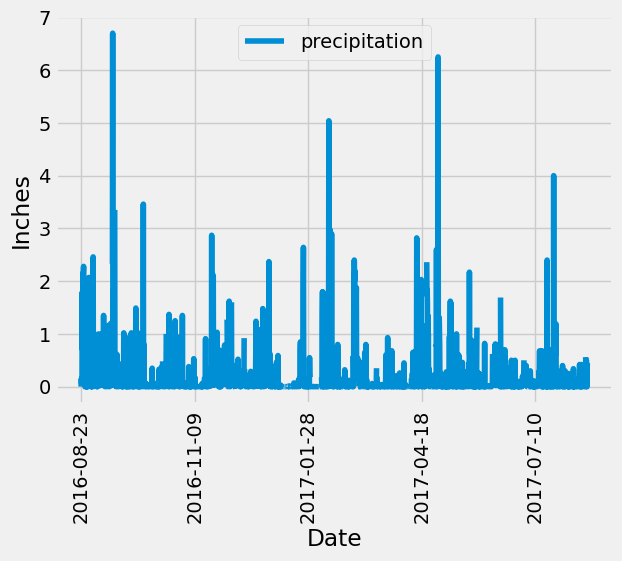

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
    # The date one year prior from '2017-08-23' is '2016-08-2016'

# Perform a query to retrieve the data and precipitation scores
past_12_mos = session.query(measurement.date, measurement.prcp).order_by(measurement.date).filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_12_mos_df = pd.DataFrame(past_12_mos, columns=['date', 'precipitation']).set_index('date')


# Sort the dataframe by date
past_12_mos_df = past_12_mos_df.sort_values(by='date')
past_12_mos_df

# Use Pandas Plotting with Matplotlib to plot the data
past_12_mos_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_12_mos_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
no_stations = session.query(station.station).count()
no_stations

9

In [75]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_sta = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = session.query(func.min(measurement.tobs), func.max(
    measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(top_station)


[(54.0, 85.0, 71.66378066378067)]


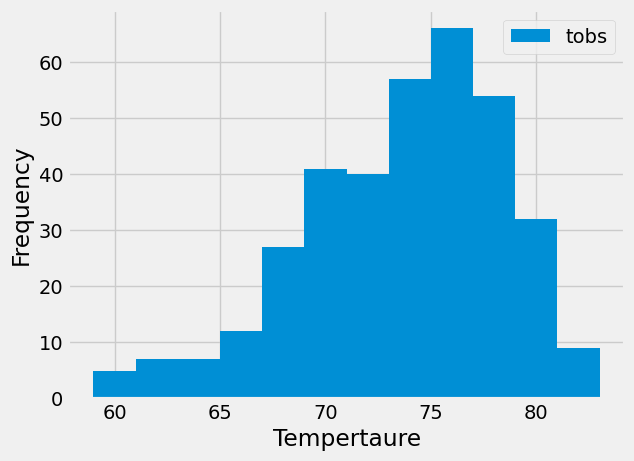

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# First need to find the most recent observation date, use same query as before
# but filter for most active station
most_active_last_obs = session.query(measurement.date).order_by(
    desc(measurement.date)).filter(measurement.station == 'USC00519281').first()
most_active_last_obs

# Calculate date for 12 mos prior, which is '2016-08-18'

# Query the last 12 months data for this station.
most_active_last_12 = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-18').all()
most_active_last_12

ma_temps = pd.DataFrame(most_active_last_12)
ma_temps

plt.hist(ma_temps, bins=12)
plt.xlabel('Tempertaure')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.show()



# Close Session

In [16]:
# Close Session
session.close()